In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hp\OneDrive\adult_with_headers.csv")
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics for numerical features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  3

In [2]:
print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [3]:
df['age'].fillna(df['age'].median(), inplace=True)
df['workclass'].fillna('Unknown', inplace=True)


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical features
num_features = ['age', 'fnlwgt', 'education_num', 'hours_per_week']

# Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = scaler_standard.fit_transform(df[num_features])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = scaler_minmax.fit_transform(df[num_features])


In [6]:
df = pd.get_dummies(df, columns=['sex', 'relationship'], drop_first=True)


In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['workclass'] = encoder.fit_transform(df['workclass'])


# Feature Engineering

In [8]:
bins = [0, 25, 45, 65, 90]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


In [10]:
df['work_hours_category'] = pd.cut(df['hours_per_week'], bins=[0, 20, 40, 60, 100], 
                                   labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])


# Log Transformation

In [11]:
import numpy as np

df['fnlwgt_log'] = np.log1p(df['fnlwgt']) 


In [12]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df[num_features])  # -1 indicates outliers
df_cleaned = df[outliers != -1]


In [13]:
pip install ppscore

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import ppscore as pps

pps_matrix = pps.matrix(df)
print(pps_matrix)


              x                        y   ppscore            case  \
0           age                      age  1.000000  predict_itself   
1           age                workclass  0.000000      regression   
2           age                   fnlwgt  0.000000      regression   
3           age                education  0.052315  classification   
4           age            education_num  0.000000      regression   
..          ...                      ...       ...             ...   
479  fnlwgt_log  relationship_ Unmarried  0.000000      regression   
480  fnlwgt_log       relationship_ Wife  0.000000      regression   
481  fnlwgt_log                age_group  0.079937  classification   
482  fnlwgt_log      work_hours_category  0.000000  classification   
483  fnlwgt_log               fnlwgt_log  1.000000  predict_itself   

     is_valid_score               metric  baseline_score   model_score  \
0              True                 None        0.000000      1.000000   
1          

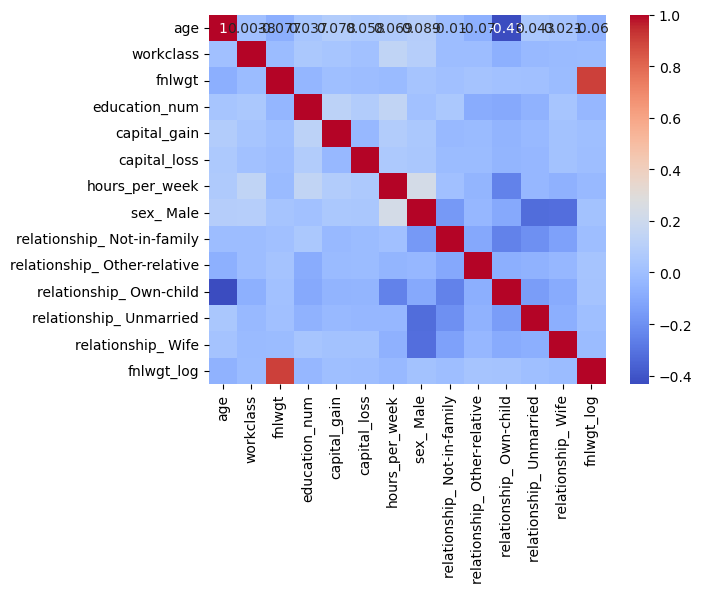

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()
